## Bibliotecas e dados

In [ ]:
!pip install nxviz=='0.6.3'

In [19]:
# import usefull packages
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import nxviz as nv
import seaborn as sns
import pandas as pd

In [88]:
G = nx.read_graphml('air_traffic_brazil.graphml')


In [98]:
data = [{'code':key,**values}for key, values in list(G.nodes(data=True))]
df = pd.DataFrame(data)

## Estudo da assortatividade pela região

In [117]:
nx.attribute_assortativity_coefficient(G,'region')

0.37160996633891646

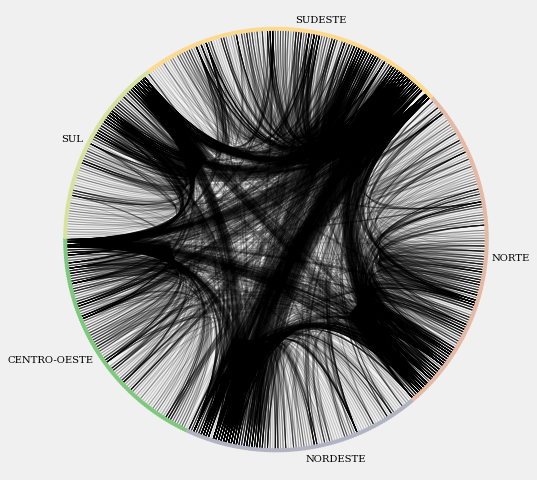

In [118]:
# Create a Circos Plot
c = nv.CircosPlot(G,
                  node_color="region",
                  node_grouping="region",
                  node_order="region",
                  group_order="alphabetically",
                  group_legend=False,
                  node_labels=False,
                  group_label_position="middle",
                  group_label_color=False,figsize=(10,8))

# Draw c to the screen
c.draw()

# If there is a continuous datatype for the nodes, 
# it will be reflected in self.sm being constructed
# It will then automatically add in a colorbar 
# to the plot and scale the plot axes accordingly
# we need remove the colobar in this case
# c.sm.colorbar.remove()

# Save figure
plt.savefig("assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

# Display graph
plt.show()

A rede apresentou uma coeficiente de, aproximadamente, 0.37 de assortatividade por região. Mostrando um valor positivo sendo assim mais tendenciada a nós de mesmo região se conectarem, entretando o coeficiente se aproxima mais do 0 do que do 1, assim mesmo que tem uma tendencia a ligações para mesma região existe muita  conexões entre regiões diferentes( como é mostrado no imagem acima).

## análise bivariada entre o grau do vértice e o número médio de vizinhos

In [119]:
# average degree of neighbors
degree, avg_neigh_degree = zip(*nx.average_degree_connectivity(G).items())

# convert to list
degree = list(degree)
avg_neigh_degree = list(avg_neigh_degree)

In [120]:
nx.degree_assortativity_coefficient(G)

-0.19974209292576134

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


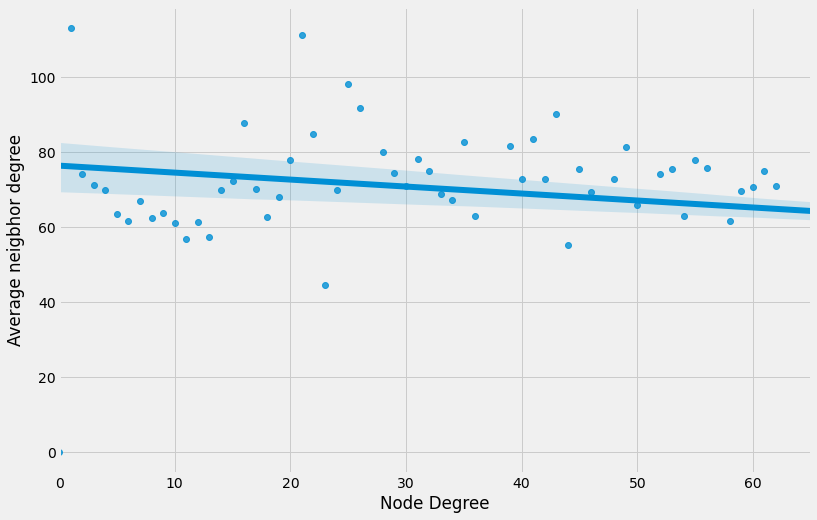

In [121]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1,figsize=(12,8))

sns.regplot(degree,avg_neigh_degree,ax=ax)

ax.set_xlabel("Node Degree")
ax.set_ylabel("Average neigbhor degree")
ax.set_xlim(0,65)

# Save figure
plt.savefig("degree_assortativity.png", 
            format="png",
            dpi=400, 
            bbox_inches="tight",
            transparent=True)

plt.show()

Analisa a relação entre o grau do vértice e o número médio de vizinhos temos o coeficiente negativo de, aproximadamente, -0.1997. Trazendo uma correlação negativa(representada no grafico acima) que indicaria uma maior tendencia a nós de maior grau de conectarem a nós de menor grau, seguindo a mesma ideia da correlação de pearson o valor apresenta uma correalção muito fraca/desprezível pra essa comparação.

## Analise das conexões da rede

In [94]:
# G is connected or not?
nx.is_connected(G)

False

In [95]:
# how many connected components has G?
nx.number_connected_components(G)

5

In [99]:
describe_components = []
# interact under all connected component of G
for component in nx.connected_components(G):
  component = list(component)
  describe_components.append({
      'tamanho': len(component),
      'representacao': (len(component)*100)/G.number_of_nodes(),
      'regioes': dict((df[df.code.isin(component)].region.value_counts()*100)/len(component))
  })

In [100]:
for v in describe_components: print(v)

{'tamanho': 497, 'representacao': 99.20159680638723, 'regioes': {'NORTE': 25.35211267605634, 'SUDESTE': 23.541247484909455, 'NORDESTE': 18.309859154929576, 'CENTRO-OESTE': 18.10865191146881, 'SUL': 14.688128772635816}}
{'tamanho': 1, 'representacao': 0.1996007984031936, 'regioes': {'SUDESTE': 100.0}}
{'tamanho': 1, 'representacao': 0.1996007984031936, 'regioes': {'NORTE': 100.0}}
{'tamanho': 1, 'representacao': 0.1996007984031936, 'regioes': {'CENTRO-OESTE': 100.0}}
{'tamanho': 1, 'representacao': 0.1996007984031936, 'regioes': {'NORTE': 100.0}}


A rede apresenta 5 componentes, sendo deles 4(representando, cada um, 0.2% da rede) que possuem apenas um Nó isolado e uma componente dominante com 497 nós (representando 99.2% da rede). Dentro de componente temos as representações das regiões sendo

Componente 1 
1.   'NORTE': 25.35%
2.   'SUDESTE': 23.54%
3.   'NORDESTE': 18.31%
4.   'CENTRO-OESTE': 18.11%
5.   'SUL': 14.69%

Componente 2
1.   'SUDESTE': 100.0%

Componente 3
1.   'NORTE':  100.0%

Componente 4
1.   'CENTRO-OESTE': 100.0%
Componente 5
1.   'NORTE': 100.0%



## Simulação de Viagem

In [111]:
airports = {
    'NORTE':df[df.region == 'NORTE']['code'].values[0],
    'NORDESTE': df[df.region == 'NORDESTE']['code'].values[0],
    'SUDESTE': df[df.region == 'SUDESTE']['code'].values[0],
    'CENTRO-OESTE': df[df.region == 'CENTRO-OESTE']['code'].values[0],
    'SUL': df[df.region == 'SUL']['code'].values[0],
}
print(airports)

{'NORTE': 'SBBV', 'NORDESTE': 'SBCV', 'SUDESTE': 'SBCF', 'CENTRO-OESTE': 'SBBR', 'SUL': 'SSUM'}


In [113]:
# Norte -> Sul
print(nx.shortest_path(G,airports['NORTE'],airports['SUL']))
print(nx.shortest_path_length(G,airports['NORTE'],airports['SUL']))

['SBBV', 'SBGR', 'SSUM']
2


Para uma viagem do Aeroporto SBBV no NORTE até o aeroporto SSUM no SUL temos uma rota com uma parada no aeroporto SBGR. Realizando uma viagem de distancia 2 na rede.

In [114]:
# SUL -> NORDESTE
print(nx.shortest_path(G,airports['SUL'],airports['NORDESTE']))
print(nx.shortest_path_length(G,airports['SUL'],airports['NORDESTE']))

['SSUM', 'SBGR', 'SBCV']
2


Para uma viagem do Aeroporto SSUM no SUL até o aeroporto SBCV no Nordeste temos uma rota com uma parada no aeroporto SBGR. Realizando uma viagem de distancia 2 na rede.

In [115]:
# NORDESTE -> CENTRO-OESTE
print(nx.shortest_path(G,airports['NORDESTE'],airports['CENTRO-OESTE']))
print(nx.shortest_path_length(G,airports['NORDESTE'],airports['CENTRO-OESTE']))

['SBCV', 'SBGL', 'SBBR']
2


Para uma viagem do Aeroporto SBCV no Nordeste até o aeroporto SBBR no Centro-oeste temos uma rota com uma parada no aeroporto SBGL. Realizando uma viagem de distancia 2 na rede.

In [116]:
# CENTRO-OESTE -> SUDESTE
print(nx.shortest_path(G,airports['CENTRO-OESTE'],airports['SUDESTE']))
print(nx.shortest_path_length(G,airports['CENTRO-OESTE'],airports['SUDESTE']))

['SBBR', 'SBCF']
1


Para uma viagem do Aeroporto SBBR no Centro-oeste até o aeroporto SBCF no Sudeste temos uma rota direta de um para o outro.